- Based on the lecture and exercise, build **ANN, RNN, and LSTM** models for time series prediction, and compare their performances.  
- The model architecture is as follows:  
  - Input layer: 1 neuron  
  - Hidden layer: 64 neurons  
  - Output layer: 1 neuron  
- Write your report to answer the following questions:  
  - What is the best approach? How do you know?  
  - Investigate hyperparameters (e.g., number of epochs, activation function, number of layers/neurons, etc.) and discuss their impacts on your model performance.


#### Importing the necessary libraries

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

#### Loading the Dataset

In [9]:
# Load data
inp = np.load("data_lstm.npz")
data_in = inp['arr_0']

This function converts 1d time series data to supervised learning dataset by forming input output pairs. In this case the past 3 days data are inputs and 4th data is input.

In [10]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Create sequences with 3 time steps
seq_length = 3
X, y = create_sequences(data_in, seq_length)

For the ANN, the input needs to be 2-dimensional, with each sample represented by its features, so `X_ann` is reshaped to `(samples, timesteps)`. For RNN and LSTM models, the input must be 3-dimensional to include the time steps and features for each sequence, so `X_lstm` is reshaped to `(samples, timesteps, features)`, where the third dimension represents that each timestep has a single feature.


In [11]:
# Reshape for different models
X_lstm = X.reshape((X.shape[0], X.shape[1], 1))  # 3D for RNN/LSTM
X_ann = X.reshape((X.shape[0], X.shape[1]))      # 2D for ANN
print(f"Sequences: {X.shape[0]}")
print(f"Input shape - ANN: {X_ann.shape}, RNN/LSTM: {X_lstm.shape}")

Sequences: 97
Input shape - ANN: (97, 3), RNN/LSTM: (97, 3, 1)


#### Creating ANN model

In [12]:
# ANN MODEL
ann_model = Sequential([
    Input(shape=(seq_length,)),
    Dense(64, activation='relu'),
    Dense(1)
])
ann_model.compile(optimizer='adam', loss='mse')
ann_history = ann_model.fit(X_ann, y,epochs=50,validation_split=0.2,verbose=0)

#### Visualizing the training history of ANN model

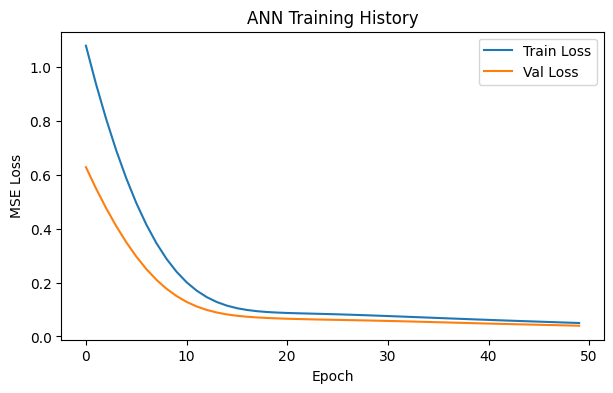

In [13]:
plt.figure(figsize=(7,4))
plt.plot(ann_history.history['loss'], label='Train Loss')
plt.plot(ann_history.history['val_loss'], label='Val Loss')
plt.title('ANN Training History')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


#### Predicting the output and calculating the rmse

In [14]:
# Predictions
ann_pred = ann_model.predict(X_ann)
ann_rmse = np.sqrt(mean_squared_error(y, ann_pred))
print("ANN RMSE:", ann_rmse)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
ANN RMSE: 0.2169040640581955


#### Creating RNN model

In [15]:
# RNN MODEL
rnn_model = Sequential([
    Input(shape=(seq_length, 1)),
    SimpleRNN(64, activation='relu'),
    Dense(1)
]) 
rnn_model.compile(optimizer='adam', loss='mse')
rnn_history = rnn_model.fit(X_lstm, y,epochs=50,validation_split=0.2,verbose=0)

#### Visualizing the training history of RNN model

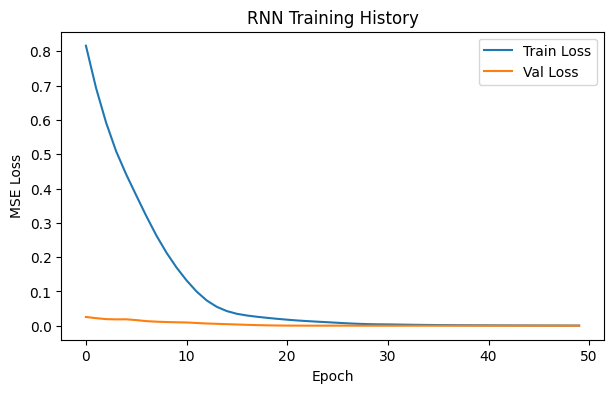

In [16]:
plt.figure(figsize=(7,4))
plt.plot(rnn_history.history['loss'], label='Train Loss')
plt.plot(rnn_history.history['val_loss'], label='Val Loss')
plt.title('RNN Training History')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

#### Predicting the output and calculating the rmse

In [17]:
# Predictions
rnn_pred = rnn_model.predict(X_lstm)
rnn_rmse = np.sqrt(mean_squared_error(y, rnn_pred))
print("RNN RMSE:", rnn_rmse)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
RNN RMSE: 0.02335495743078533


#### Creating LSTM model

In [18]:
# LSTM MODEL
lstm_model = Sequential([
    Input(shape=(seq_length, 1)),
    LSTM(64, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_history = lstm_model.fit(X_lstm, y,epochs=50,validation_split=0.2,verbose=0)

#### Visualizing the training history of RNN model

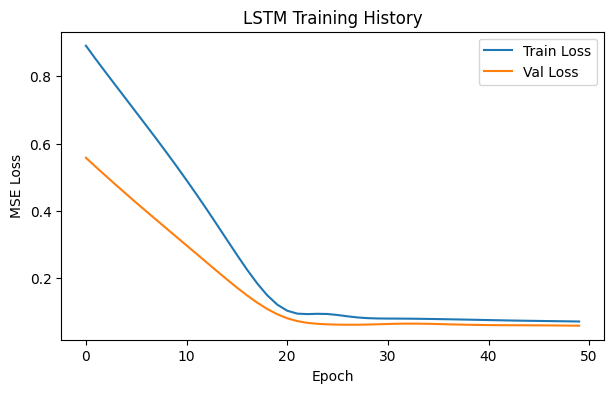

In [19]:
plt.figure(figsize=(7,4))
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Val Loss')
plt.title('LSTM Training History')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

#### Predicting the output and calculating the rmse

In [20]:
# Predictions
lstm_pred = lstm_model.predict(X_lstm)
lstm_rmse = np.sqrt(mean_squared_error(y, lstm_pred))
print("LSTM RMSE:", lstm_rmse)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000261486CE020> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
LSTM RMSE: 0.2610375071962149


#### Comparison of RMSE of three models using same configuration

In [21]:
print("RMSE comparison")
print(f"ANN RMSE :  {ann_rmse:.6f}")
print(f"RNN RMSE :  {rnn_rmse:.6f}")
print(f"LSTM RMSE: {lstm_rmse:.6f}")

RMSE comparison
ANN RMSE :  0.216904
RNN RMSE :  0.023355
LSTM RMSE: 0.261038


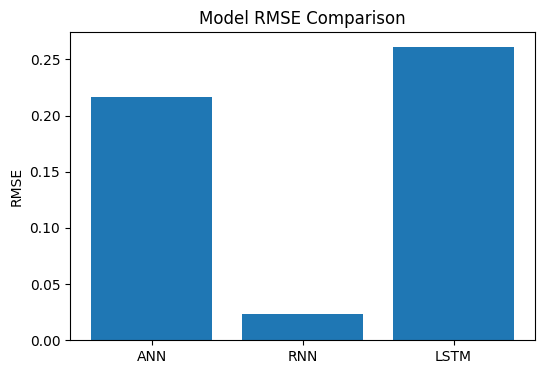

In [22]:
plt.figure(figsize=(6,4))
plt.bar(["ANN","RNN","LSTM"], [ann_rmse, rnn_rmse, lstm_rmse])
plt.title("Model RMSE Comparison")
plt.ylabel("RMSE")
plt.show()

#### Hyperparameter tuning of ANN


In [23]:
# Hyperparameter tuning for ANN: neurons, epochs, activation
activations = ['relu', 'tanh', 'sigmoid']
ann_results = {}

for neurons in [32, 64, 128]:
    for epochs in [50, 100]:
        for act in activations:
            model = Sequential([
                Input(shape=(seq_length,)),
                Dense(neurons, activation=act),
                Dense(1)
            ])
            model.compile(optimizer='adam', loss='mse')
            model.fit(X_ann, y, epochs=epochs, validation_split=0.2, verbose=0)
            pred = model.predict(X_ann, verbose=0)
            rmse = np.sqrt(mean_squared_error(y, pred))

            ann_results[(neurons, epochs, act)] = rmse


In [24]:
best_ann_config = min(ann_results, key=ann_results.get)
best_ann_rmse = ann_results[best_ann_config]

print("Best ANN configuration:", best_ann_config)
print("Best ANN RMSE:", best_ann_rmse)


Best ANN configuration: (128, 100, 'relu')
Best ANN RMSE: 0.02665933988294375


For the ANN, increasing the number of neurons from 32 to 128 improved performance, as a larger hidden layer allows the network to learn more complex patterns. Training for more epochs, from 50 to 100, further reduced the RMSE. Among activation functions, ReLU provided the best results, while tanh was slightly less effective, and sigmoid resulted in higher errors. The best ANN configuration used 128 neurons, 100 epochs, and ReLU activation, achieving an RMSE of 0.0266.

In [25]:
neurons, epochs, act = best_ann_config
best_ann_model = Sequential([
    Input(shape=(seq_length,)),
    Dense(neurons, activation=act),
    Dense(1)
])
best_ann_model.compile(optimizer='adam', loss='mse')
best_ann_model.fit(X_ann, y, epochs=epochs, validation_split=0.2, verbose=0)
best_ann_pred = best_ann_model.predict(X_ann, verbose=0)

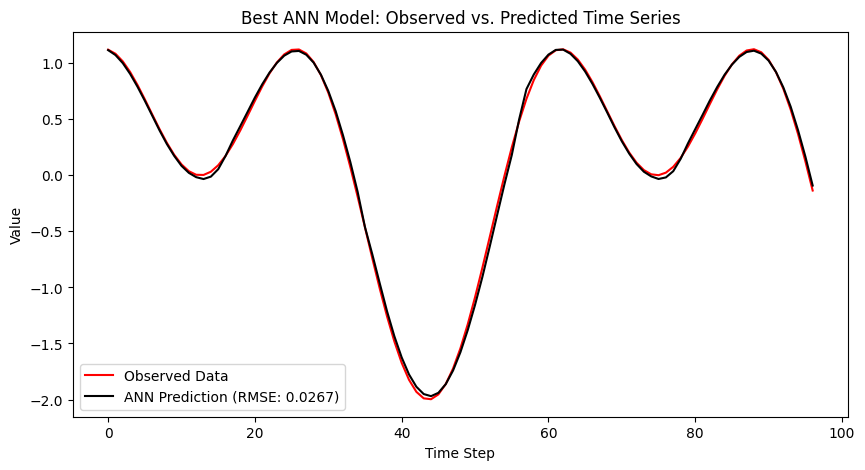

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(y, label='Observed Data', color='red')
plt.plot(best_ann_pred, label=f'ANN Prediction (RMSE: {best_ann_rmse:.4f})', color='black')
plt.title('Best ANN Model: Observed vs. Predicted Time Series')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()

#### Hyperparameter tuning of RNN

In [27]:
# Hyperparameter tuning for RNN: neurons, epochs, activation
rnn_results = {}
activations = ['relu', 'tanh', 'sigmoid']

for neurons in [32, 64, 128]:
    for epochs in [50, 100]:
        for act in activations:
            model = Sequential([
                Input(shape=(seq_length, 1)),
                SimpleRNN(neurons, activation=act),
                Dense(1)
            ])
            model.compile(optimizer='adam', loss='mse')
            model.fit(X_lstm, y, epochs=epochs, validation_split=0.2, verbose=0)
            pred = model.predict(X_lstm, verbose=0)
            rmse = np.sqrt(mean_squared_error(y, pred))

            rnn_results[(neurons, epochs, act)] = rmse


In [28]:
# Best RNN configuration
best_rnn_config = min(rnn_results, key=rnn_results.get)
best_rnn_rmse = rnn_results[best_rnn_config]

print("Best RNN configuration:", best_rnn_config)
print("Best RNN RMSE:", best_rnn_rmse)

Best RNN configuration: (128, 100, 'relu')
Best RNN RMSE: 0.014090194294850072


For the RNN, hyperparameter tuning showed that a larger hidden layer of 128 neurons was necessary to achieve optimal performance for the dataset. Increasing epochs to 100 allowed the model to converge better, and the best configuration of 128 neurons, 100 epochs, and ReLU activation achieved the lowest RMSE of 0.01409, outperforming both ANN and LSTM.

In [29]:
neurons, epochs, act = best_rnn_config
best_rnn_model = Sequential([
    Input(shape=(seq_length, 1)),
    SimpleRNN(neurons, activation=act),
    Dense(1)
])
best_rnn_model.compile(optimizer='adam', loss='mse')
best_rnn_model.fit(X_lstm, y, epochs=epochs, validation_split=0.2, verbose=0)
best_rnn_pred = best_rnn_model.predict(X_lstm, verbose=0)

#### Plot of observed vs predicted time series data

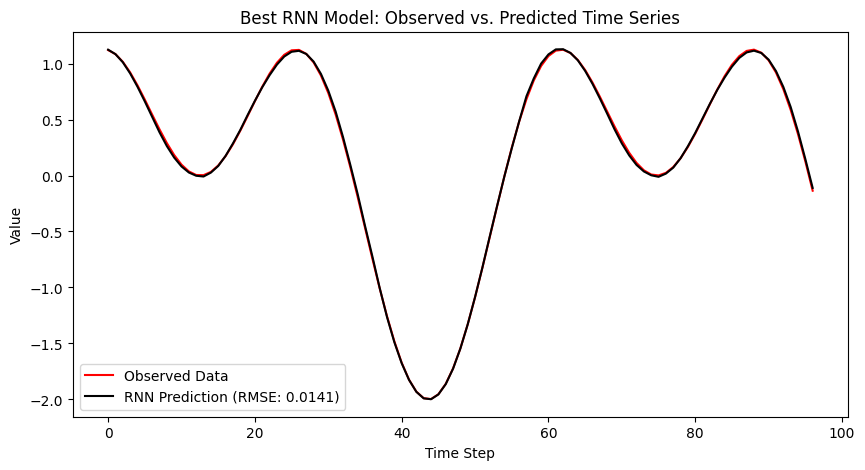

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y, label='Observed Data', color='red')
plt.plot(best_rnn_pred, label=f'RNN Prediction (RMSE: {best_rnn_rmse:.4f})', color='black')
plt.title('Best RNN Model: Observed vs. Predicted Time Series')
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()

#### Hyperparameter tuning of LSTM

In [31]:
# Hyperparameter tuning for LSTM: neurons, epochs, activation
lstm_results = {}
activations = ['relu', 'tanh', 'sigmoid']

for neurons in [32, 64, 128]:
    for epochs in [50, 100]:
        for act in activations:
            model = Sequential([
                Input(shape=(seq_length, 1)),
                LSTM(neurons, activation=act),
                Dense(1)
            ])
            model.compile(optimizer='adam', loss='mse')
            model.fit(X_lstm, y, epochs=epochs, validation_split=0.2, verbose=0)
            pred = model.predict(X_lstm, verbose=0)
            rmse = np.sqrt(mean_squared_error(y, pred))

            lstm_results[(neurons, epochs, act)] = rmse



In [32]:
# Best LSTM configuration
best_lstm_config = min(lstm_results, key=lstm_results.get)
best_lstm_rmse = lstm_results[best_lstm_config]

print("Best LSTM configuration:", best_lstm_config)
print("Best LSTM RMSE:", best_lstm_rmse)

Best LSTM configuration: (128, 100, 'relu')
Best LSTM RMSE: 0.1196654660422185


For the LSTM, increasing the number of neurons to 128 improved learning, and training for 100 epochs slightly reduced RMSE. ReLU activation again performed best, while sigmoid resulted in higher errors. However, the best LSTM configuration of 128 neurons, 100 epochs, ReLU activation achieved an RMSE of 0.1196, which is higher than the tuned RNN and even slightly higher than the baseline LSTM. This indicates that, for very short sequences and a small dataset, the LSTM’s additional complexity does not provide a clear advantage and can even lead to overfitting. LSTM is better suited for longer and more complex temporal sequences.

#### Fitting the model with best configuration

In [33]:
neurons, epochs, act = best_lstm_config
best_lstm_model = Sequential([
    Input(shape=(seq_length, 1)),
    LSTM(neurons, activation=act),
    Dense(1)
])
best_lstm_model.compile(optimizer='adam', loss='mse')
best_lstm_model.fit(X_lstm, y, epochs=epochs, validation_split=0.2, verbose=0)
best_lstm_pred = best_lstm_model.predict(X_lstm, verbose=0)

#### Plot of observed vs predicted time series data

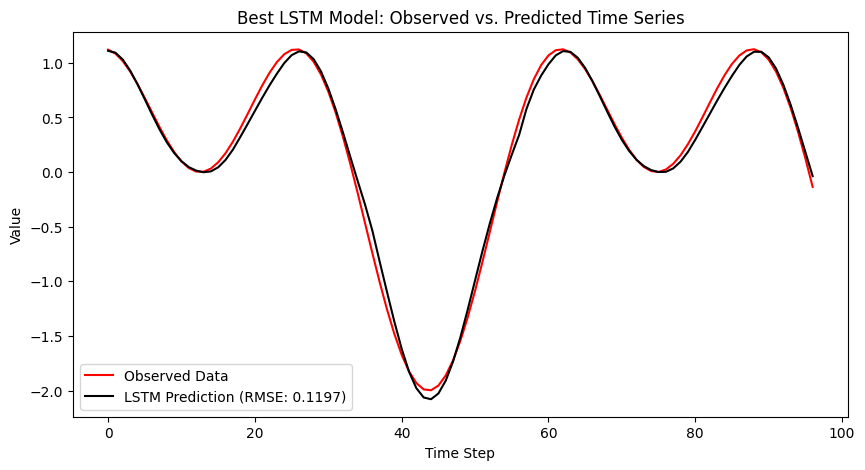

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(y, label='Observed Data', color='red')
plt.plot(best_lstm_pred, label=f'LSTM Prediction (RMSE: {best_lstm_rmse:.4f})', color='black')
plt.title('Best LSTM Model: Observed vs. Predicted Time Series')
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()

#### 1. What is the best approach? How do you know?
Based on the results obtained from the models, the RNN is the best approach for this time series prediction task. The performance metric used was RMSE, and the baseline RNN achieved an RMSE of 0.0233, which is significantly lower than the ANN (0.216) and LSTM (0.261).After hyperparameter tuning, the RNN further improved to 0.01409 which is better than both tuned ANN and LSTM, confirming its superiority.RNN obtained greater accuracy than LSTM because  this dataset uses sequences of only 3 time steps. LSTMs is suitable for modeling longer sequences with more complex long term dependencies, so their gating mechanisms are not fully utilized here. Moreover this dataset have only 97 sequences and with this small datasets LSTM are prone to overfitting. ANN  performed worse than both RNN and LSTM because it does not have any mechanism to capture temporal dependencies. ANNs treat each input as independent, so even though it sees the previous 3 values as features, it cannot model the sequential relationship.

#### 2. Investigate hyperparameters and discuss their impacts on model performance

Hyperparameter tuning had a significant impact on the performance of all three models. For number of neurons, increasing from 32 to 128 generally improved the learning capacity of ANN and LSTM models, as more neurons allowed the networks to capture more complex patterns. Furthermore, for the RNN, the best performance was also achieved with 128 neurons, suggesting that a larger number of neuron was necessary to fully capture the complex temporal dependencies. Number of epochs also affected performance: training for 100 epochs instead of 50 consistently reduced RMSE, allowing the models to converge better, though excessive epochs could risk overfitting. Regarding activation functions, ReLU consistently produced the lowest RMSE across ANN, RNN, and LSTM, likely because the dataset contains non-negative values and avoids vanishing gradients. Tanh performed moderately well, while sigmoid often resulted in higher errors due to gradient saturation. 